In [1]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

C:\Users\nikita059240\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data=pd.read_csv('D:/Insurance_Loss.csv',index_col=0)
data.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
Policy Number,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595
144880,31,10,1,F,Single,6,P,402.197302
133742,56,37,1,M,Married,0,D,553.132096
151282,52,31,1,F,Married,15,P,292.430579
174407,20,3,1,M,Single,15,P,246.540576


In [3]:
data.columns=['Age','Years_of_Driving_Experience','Number_of_Vehicle','Gender','Married','Vehicle_Age','Fuel_Type','Losses']
data.head()

,Age,Years_of_Driving_Experience,Number_of_Vehicle,Gender,Married,Vehicle_Age,Fuel_Type,Losses
Policy Number,,,,,,,,
150024,24,5,1,M,Married,11,P,203.319595
144880,31,10,1,F,Single,6,P,402.197302
133742,56,37,1,M,Married,0,D,553.132096
151282,52,31,1,F,Married,15,P,292.430579
174407,20,3,1,M,Single,15,P,246.540576


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15290 entries, 150024 to 157201
Data columns (total 8 columns):
Age                            15290 non-null int64
Years_of_Driving_Experience    15290 non-null int64
Number_of_Vehicle              15290 non-null int64
Gender                         15290 non-null object
Married                        15290 non-null object
Vehicle_Age                    15290 non-null int64
Fuel_Type                      15290 non-null object
Losses                         15290 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


In [5]:
data.shape

(15290, 8)

In [6]:
data.describe()

,Age,Years_of_Driving_Experience,Number_of_Vehicle,Vehicle_Age,Losses
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,42.328254,23.732897,2.495880,8.655723,389.859718
std,18.280511,17.850707,0.953776,4.344536,253.729433
min,16.000000,0.000000,1.000000,0.000000,12.534521
25%,24.000000,6.000000,2.000000,6.000000,226.434217
50%,42.000000,23.000000,2.000000,9.000000,354.937874
75%,61.000000,42.000000,3.000000,12.000000,488.676927
max,70.000000,53.000000,4.000000,15.000000,3500.000000


In [7]:
data.mode()

,Age,Years_of_Driving_Experience,Number_of_Vehicle,Gender,Married,Vehicle_Age,Fuel_Type,Losses
0,25,0,2,F,Married,12,P,2879.0


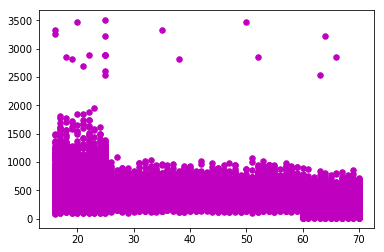

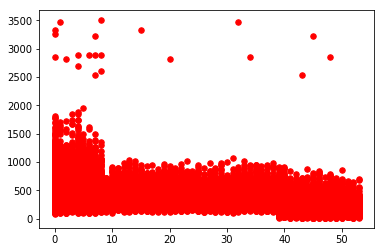

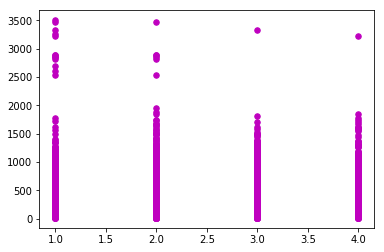

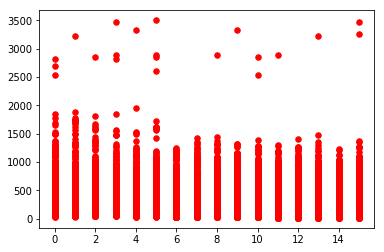

In [8]:
plt.scatter(x='Age',y='Losses',data=data,color='m',marker='o',s=30)
plt.show()
plt.scatter(x='Years_of_Driving_Experience',y='Losses',data=data,color='red',marker='o',s=30)
plt.show()
plt.scatter(x='Number_of_Vehicle',y='Losses',data=data,color='m',marker='o',s=30)
plt.show()
plt.scatter(x='Vehicle_Age',y='Losses',data=data,color='red',marker='o',s=30)
plt.show()

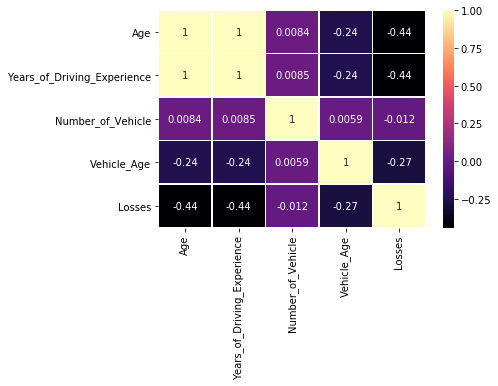

In [9]:
corr = data.corr()
df = pd.DataFrame(data.corr())
sns.heatmap(df, cmap='magma', linewidths=0.5, annot=True)
plt.show()

In [10]:
data['Gender']=data.Gender.map({'F':0,'M':1})
data['Married']=data.Married.map({'Married':1,'Single':0})
data['Fuel_Type']=data.Fuel_Type.map({'P':1,'D':0})
data.head()

,Age,Years_of_Driving_Experience,Number_of_Vehicle,Gender,Married,Vehicle_Age,Fuel_Type,Losses
Policy Number,,,,,,,,
150024,24,5,1,1,1,11,1,203.319595
144880,31,10,1,0,0,6,1,402.197302
133742,56,37,1,1,1,0,0,553.132096
151282,52,31,1,0,1,15,1,292.430579
174407,20,3,1,1,0,15,1,246.540576


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15290 entries, 150024 to 157201
Data columns (total 8 columns):
Age                            15290 non-null int64
Years_of_Driving_Experience    15290 non-null int64
Number_of_Vehicle              15290 non-null int64
Gender                         15290 non-null int64
Married                        15290 non-null int64
Vehicle_Age                    15290 non-null int64
Fuel_Type                      15290 non-null int64
Losses                         15290 non-null float64
dtypes: float64(1), int64(7)
memory usage: 1.7 MB


In [50]:
lm=smf.ols(formula='Losses~Age+Years_of_Driving_Experience+Number_of_Vehicle+Fuel_Type+Gender+Married+Vehicle_Age+Fuel_Type',data=data).fit()
lm

In [51]:
parameter=lm.params
parameter

Intercept                      932.238006
Age                             -4.157341
Years_of_Driving_Experience     -0.431676
Number_of_Vehicle               -1.918380
Fuel_Type                     -301.419343
Gender                          51.105100
Married                        -79.846369
Vehicle_Age                    -12.232788
dtype: float64

In [52]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     3718.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        12:36:28   Log-Likelihood:                -98743.
No. Observations:               15290   AIC:                         1.975e+05
Df Residuals:                   15282   BIC:                         1.976e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     932.2380     17.543     53.141      0.000     897.852     966.624
Age                            -4.1573      0.913     -4.553      0.000      -5.947      -2.368
Years_of_Driving_Experience    -0.4317      0.932     -0.463      0.643      -2.258       1.395
Number_of_Vehicle              -1.9184      1.309     -1.465      0.143      -4.484       0.648
Fuel_Type                    -301.4193      3.589    -83.988      0.000    -308.454    -294.385
Gender                         51.1051      2.547     20.062      0.000      46.112      56.098
Married                       -79.8464      2.588    -30.852      0.000     -84.919     -74.774
Vehicle_Age                   -12.2328      0.328    -37.298      0.000     -12.876     -11.590
==============================================================================
Omnibus:                    18019.325   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5261211.478
Skew:                           5.889   Prob(JB):                         0.00
Kurtosis:                      93.109   Cond. No.                         776.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
lm=smf.ols(formula='Losses~Age+Fuel_Type+Gender+Married+Vehicle_Age+Fuel_Type',data=data).fit()
lm

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Losses   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     5204.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        12:36:29   Log-Likelihood:                -98744.
No. Observations:               15290   AIC:                         1.975e+05
Df Residuals:                   15284   BIC:                         1.975e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     935.1610      4.899    190.891      0.000     925.559     944.763
Age            -4.5798      0.079    -58.084      0.000      -4.734      -4.425
Fuel_Type    -301.3555      3.587    -84.025      0.000    -308.385    -294.325
Gender         51.0876      2.547     20.058      0.000      46.095      56.080
Married       -79.8139      2.588    -30.840      0.000     -84.887     -74.741
Vehicle_Age   -12.2477      0.327    -37.446      0.000     -12.889     -11.607
==============================================================================
Omnibus:                    18036.236   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5287909.370
Skew:                           5.898   Prob(JB):                         0.00
Kurtosis:                      93.338   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#H0: error term are homoscedasity #variansinya konstan
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

test=sms.het_goldfeldquandt(lm.resid,lm.model.exog)
test

(0.5788160127493314, 0.9999999999999999, 'increasing')

In [56]:
y=data['Losses']
x=data.drop('Losses',1)
x=x.drop('Years_of_Driving_Experience',1)
x=x.drop('Number_of_Vehicle',1)
x.head()

,Age,Gender,Married,Vehicle_Age,Fuel_Type
Policy Number,,,,,
150024,24,1,1,11,1
144880,31,0,0,6,1
133742,56,1,1,0,0
151282,52,0,1,15,1
174407,20,1,0,15,1


In [57]:
data.head()

,Age,Years_of_Driving_Experience,Number_of_Vehicle,Gender,Married,Vehicle_Age,Fuel_Type,Losses
Policy Number,,,,,,,,
150024,24,5,1,1,1,11,1,203.319595
144880,31,10,1,0,0,6,1,402.197302
133742,56,37,1,1,1,0,0,553.132096
151282,52,31,1,0,1,15,1,292.430579
174407,20,3,1,1,0,15,1,246.540576


In [58]:
#Imports
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor






# get y and X dataframes based on this regression:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [59]:
vif.round(1)

,VIF Factor,features
0,4.7,Age
1,1.9,Gender
2,2.0,Married
3,4.0,Vehicle_Age
4,6.3,Fuel_Type


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002249D62EFD0>]],
      dtype=object)

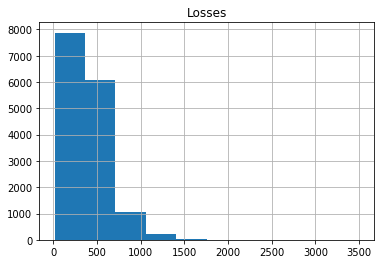

In [60]:
data.hist('Losses')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002249D61EC50>]],
      dtype=object)

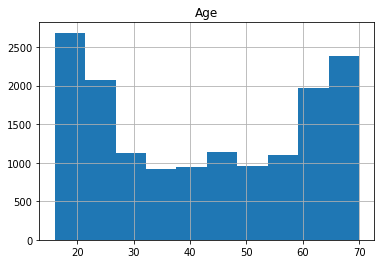

In [61]:
data.hist('Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224A044BA58>]],
      dtype=object)

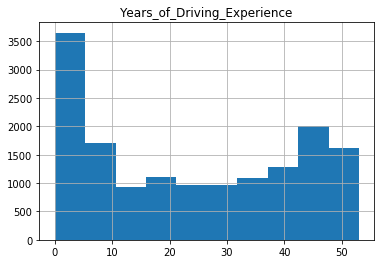

In [62]:
data.hist('Years_of_Driving_Experience')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002249D9AA9B0>]],
      dtype=object)

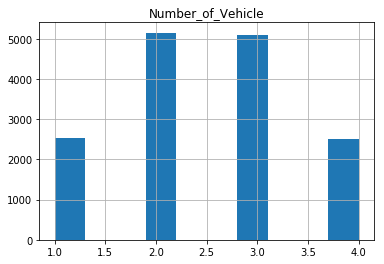

In [63]:
data.hist('Number_of_Vehicle')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224A03442B0>]],
      dtype=object)

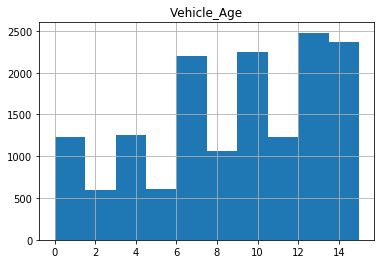

In [64]:
data.hist('Vehicle_Age')

In [65]:
from statsmodels.stats import diagnostic

diagnostic.acorr_ljungbox(lm.resid, lags=1)

#p-value > 0.05 sehingga tidak ada autocorrelation

(array([502.3651726]), array([2.90642339e-111]))

In [66]:
#H0: error term are homoscedasity #variansinya konstan
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

test=sms.het_goldfeldquandt(lm.resid,lm.model.exog)
test

(0.5788160127493314, 0.9999999999999999, 'increasing')

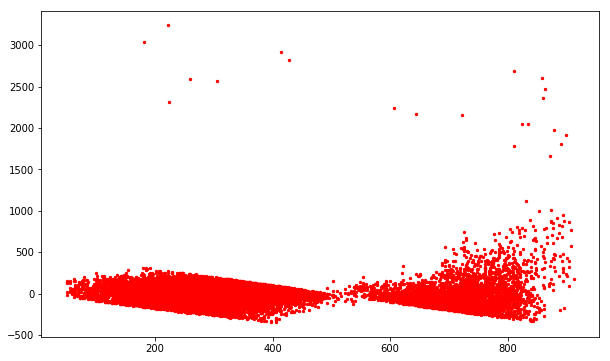

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(lm.predict(), lm.resid, s = 5.5, color='r')
plt.show()